<a href="https://colab.research.google.com/github/poojithabijjam/Stock-Market-Predictor/blob/main/stockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [ ]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 6.0 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
start = '2010-01-01'
end = '2019-12-31'
df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546383
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442254
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430346
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.473097


In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.835594
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.221161
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.194130
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.616676
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.139954


In [ ]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546383
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442254
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430346
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.473097


In [ ]:
df = df.drop(['Date', 'Adj Close'], axis=1)

In [ ]:
df.head()

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0


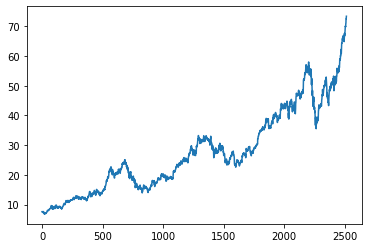

In [ ]:
plt.plot(df.Close)

In [ ]:
df

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0
...,...,...,...,...,...
2511,71.222504,70.730003,71.172501,71.067497,48478800.0
2512,72.495003,71.175003,71.205002,72.477501,93121200.0
2513,73.492500,72.029999,72.779999,72.449997,146266000.0
2514,73.172501,71.305000,72.364998,72.879997,144114400.0


In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
2515    60.331875
Name: Close, Length: 2516, dtype: float64

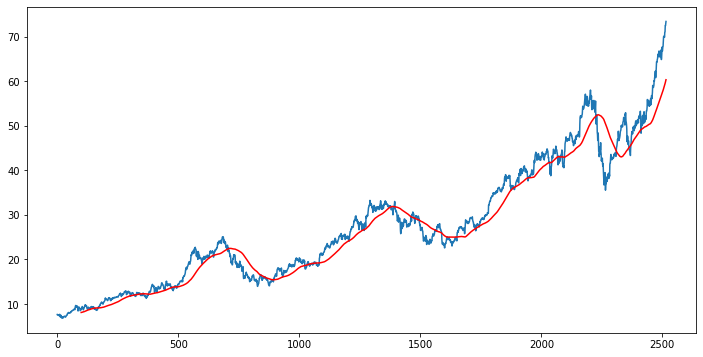

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

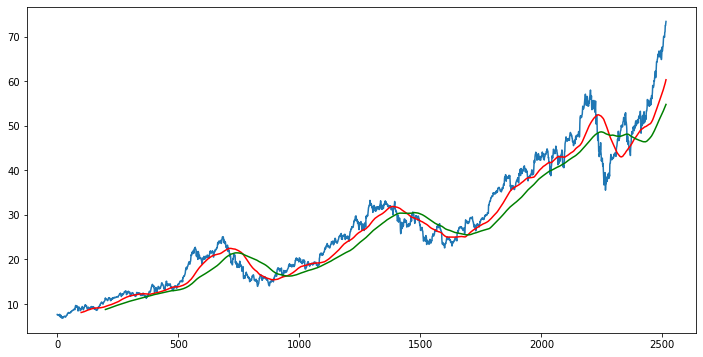

In [ ]:
ma200 = df.Close.rolling(200).mean()
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [ ]:
df.shape


(2516, 5)

In [ ]:
dataTraining = pd.DataFrame(df['Close'][:int(len(df) * 0.7)])
dataTesting = pd.DataFrame(df['Close'][int(len(df) * 0.7):])
print(dataTraining.shape)
print(dataTesting.shape)

(1761, 1)
(755, 1)


In [ ]:
dataTraining.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [ ]:
dataTesting.head()

,Close
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
1765,29.477501


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
dataTrainingArray = scaler.fit_transform(dataTraining)
dataTrainingArray

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.85089656],
       [0.84616011],
       [0.84587593]])

In [ ]:
dataTrainingArray.shape

(1761, 1)

In [ ]:
xTrain = []
yTrain = []
for i in range(100, dataTrainingArray.shape[0]):
  xTrain.append(dataTrainingArray[i-100: i])
  yTrain.append(dataTrainingArray[i, 0])
xTrain, yTrain = np.array(xTrain), np.array(yTrain)


In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(xTrain.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xTrain, yTrain, epochs=50)

Epoch 1/50
52/52 [==============================] - 22s 299ms/step - loss: 0.0626
Epoch 2/50
52/52 [==============================] - 16s 317ms/step - loss: 0.0134
Epoch 3/50
52/52 [==============================] - 16s 298ms/step - loss: 0.0122
Epoch 4/50
52/52 [==============================] - 15s 293ms/step - loss: 0.0098
Epoch 5/50
52/52 [==============================] - 16s 300ms/step - loss: 0.0089
Epoch 6/50
52/52 [==============================] - 16s 301ms/step - loss: 0.0089
Epoch 7/50
52/52 [==============================] - 15s 285ms/step - loss: 0.0089
Epoch 8/50
52/52 [==============================] - 15s 296ms/step - loss: 0.0083
Epoch 9/50
52/52 [==============================] - 15s 297ms/step - loss: 0.0080
Epoch 10/50
52/52 [==============================] - 16s 316ms/step - loss: 0.0071
Epoch 11/50
52/52 [==============================] - 15s 297ms/step - loss: 0.0068
Epoch 12/50
52/52 [==============================] - 17s 321ms/step - loss: 0.0071
Epoch 13/50
5

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import torch
model_save_name = 'keras_model.h5'
path = F"/content/gdrive/My Drive/{model_save_name}" 
torch.save(model.save('keras_model.h5'), path)

In [ ]:
dataTesting.head()

,Close
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
1765,29.477501


In [ ]:
past100Days = dataTraining.tail(100)

In [ ]:
finalDF = past100Days.append(dataTesting, ignore_index=True)

In [ ]:
finalDF.head()

,Close
0,27.202499
1,27.000000
2,26.982500
3,27.045000
4,27.370001


In [ ]:
inputData = scaler.fit_transform(finalDF)
inputData

array([[0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.07269581],
       [0.076

In [ ]:
inputData.shape

(855, 1)

In [ ]:
xTest = []
yTest = []

for i in range(100, inputData.shape[0]):
  xTest.append(inputData[i-100:i])
  yTest.append(inputData[i, 0])

In [ ]:
xTest, yTest = np.array(xTest), np.array(yTest)
print(xTest.shape)
print(yTest.shape)

(755, 100, 1)
(755,)


In [ ]:
yPred = model.predict(xTest)

In [ ]:
yPred.shape

(755, 1)

In [ ]:
yTest

array([0.06660719, 0.06833931, 0.06765694, 0.07075375, 0.07757719,
       0.08324586, 0.08387573, 0.08723495, 0.08461056, 0.08350831,
       0.08854715, 0.08849465, 0.08739241, 0.08854715, 0.08896706,
       0.08838969, 0.09841487, 0.09872982, 0.09878228, 0.09710267,
       0.09563301, 0.13447409, 0.13331935, 0.1362062 , 0.14255719,
       0.14906573, 0.15174258, 0.15373715, 0.15216249, 0.15830357,
       0.16738404, 0.1699559 , 0.16911615, 0.17105818, 0.17620198,
       0.178354  , 0.17530969, 0.17599206, 0.17740917, 0.17772417,
       0.19242073, 0.1880643 , 0.19236827, 0.19005879, 0.19100361,
       0.18827421, 0.18659456, 0.18900904, 0.18932396, 0.18822176,
       0.19593749, 0.19714469, 0.19347055, 0.20118628, 0.19268318,
       0.20097628, 0.19835189, 0.19688223, 0.19814197, 0.21346844,
       0.21514801, 0.21415073, 0.21273361, 0.21294353, 0.21855977,
       0.21462318, 0.21273361, 0.21105396, 0.21016167, 0.20207857,
       0.20297085, 0.19903426, 0.20312831, 0.19982154, 0.19709

In [ ]:
yPred

array([[0.1335609 ],
       [0.13449442],
       [0.13537708],
       [0.13618772],
       [0.13691226],
       [0.1375525 ],
       [0.13813019],
       [0.13867684],
       [0.13922188],
       [0.13978972],
       [0.14038761],
       [0.14101674],
       [0.14168039],
       [0.1423741 ],
       [0.1430883 ],
       [0.14381284],
       [0.14453596],
       [0.14525685],
       [0.14599118],
       [0.14675029],
       [0.1475363 ],
       [0.14833963],
       [0.14920543],
       [0.15023734],
       [0.15151605],
       [0.15310407],
       [0.15504867],
       [0.15737557],
       [0.16008136],
       [0.1631268 ],
       [0.1664577 ],
       [0.17003287],
       [0.17381632],
       [0.17775974],
       [0.18180823],
       [0.1859169 ],
       [0.19004855],
       [0.19415474],
       [0.19816524],
       [0.20201848],
       [0.2056902 ],
       [0.20919189],
       [0.21253327],
       [0.21572663],
       [0.21877287],
       [0.22166574],
       [0.22438622],
       [0.226

In [ ]:
scaler.scale_

array([0.02099517])

In [ ]:
scaleFactor = 1/0.02099517
yPred = yPred * scaleFactor
yTest = yTest * scaleFactor

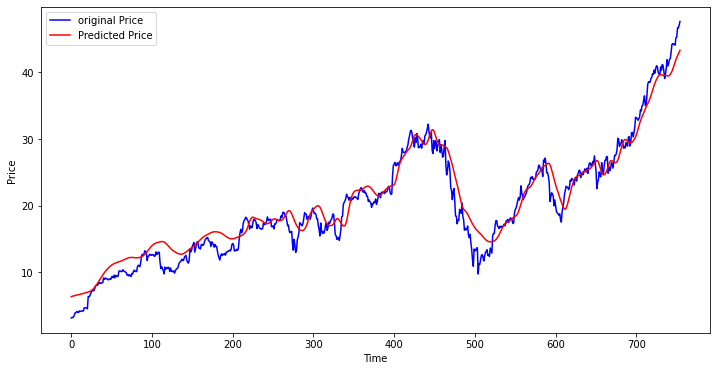

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(yTest, 'b', label="original Price")
plt.plot(yPred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()